## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('/home/daniel/mids-datasci200-spring24-Daniel-Brown/2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/tmp/ipykernel_54275/1350315416.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('/home/daniel/mids-datasci200-spring24-Daniel-Brown/2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

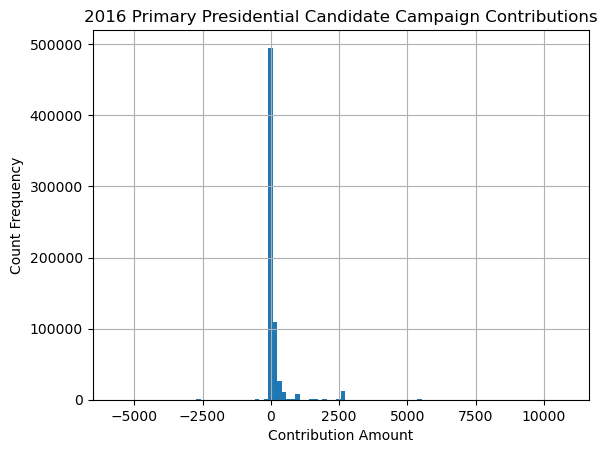

In [101]:
# 1a YOUR CODE HERE

plt.figure()
plt.title('2016 Primary Presidential Candidate Campaign Contributions')  
plt.xlabel('Contribution Amount')
plt.ylabel('Count Frequency')
plt.grid(True)


contrib['contb_receipt_amt'].hist(bins=100) 

plt.show()

- **1a answer here:** The vast majority of people contribute in the range of 0 - $2500, with a overwhelming majority being closer to $0 than to $2500. 

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

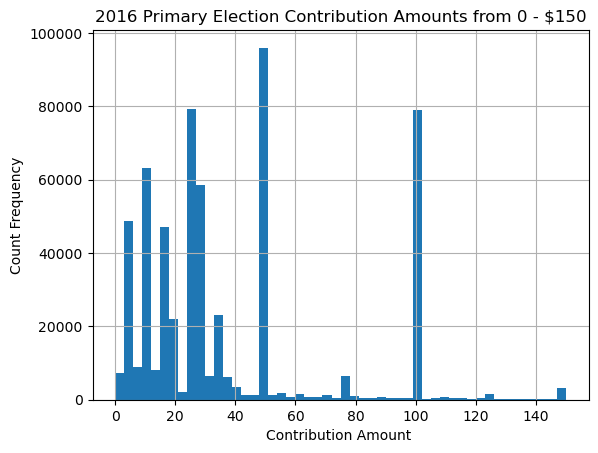

In [158]:
# 1b YOUR CODE HERE

plt.figure()
plt.title('2016 Primary Election Contribution Amounts from 0 - $150')
plt.xlabel('Contribution Amount ')
plt.ylabel('Count Frequency')
plt.grid(True)

zoomed_in = contrib[(contrib['contb_receipt_amt'] >0) &(contrib['contb_receipt_amt']<= 150)]
zoomed_in['contb_receipt_amt'].hist(bins=50, range=(0,150))

plt.show()

- **1b answer here:** Figure 1a shows a wider range of contributions, giving an indication that a majority of contributions fall between $0 - $2500, but the specififity within that range being hard to recognize. Figure 2a gets more specific within that range illustrating that a large majority of the contributions are $0 - $100 with the contribution frequency decreasing by a large margin after the $100 mark. 

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

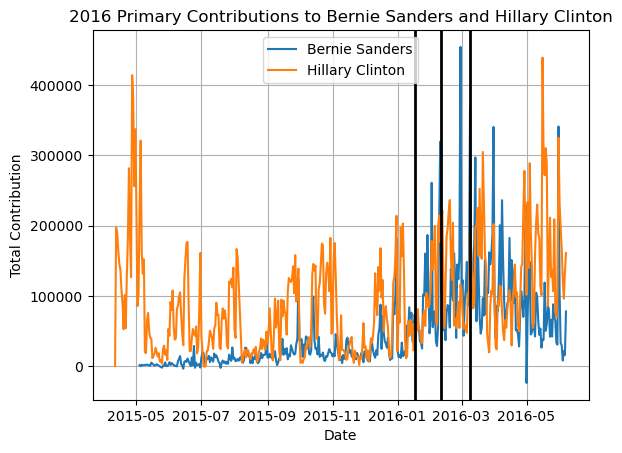

In [106]:
plt.figure()
contrib['contb_receipt_dt'] = pd.to_datetime(contrib['contb_receipt_dt'])

sanders = contrib[contrib['cand_nm']== 'Sanders, Bernard']
sanders_total= sanders.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
plt.plot(sanders_total.index, sanders_total, label='Bernie Sanders')

clinton= contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
clinton_total =clinton.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
plt.plot(clinton_total.index,clinton_total, label='Hillary Clinton')

debates = ['2016-01-17', '2016-02-11','2016-03-09']
for day in debates:
    plt.axvline(pd.to_datetime(day),color = 'black', linewidth=2)

plt.title('2016 Primary Contributions to Bernie Sanders and Hillary Clinton')
plt.xlabel('Date')
plt.ylabel('Total Contribution')
plt.legend()
plt.grid(True)
plt.show()


- **1c answer here:** From the graph, it would seen that both Bernie Sanders and Hillary Clinton's total contributions rose after each debate. Bernie Sander's contributions spiked higher than Hillary Clintons after the debates.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [122]:
# 2a YOUR CODE HERE
donations= contrib.groupby('cand_nm').size()
count_sort = donations.sort_values(ascending=False)

print(count_sort)


cand_nm
Sanders, Bernard             379284
Clinton, Hillary Rodham      171104
Cruz, Rafael Edward 'Ted'     56355
Carson, Benjamin S.           27015
Rubio, Marco                  13267
Fiorina, Carly                 4679
Paul, Rand                     4164
Trump, Donald J.               3806
Bush, Jeb                      3056
Kasich, John R.                2957
Walker, Scott                   666
Huckabee, Mike                  531
O'Malley, Martin Joseph         392
Lessig, Lawrence                353
Christie, Christopher J.        333
Graham, Lindsey O.              305
Stein, Jill                     180
Webb, James Henry Jr.           106
Perry, James R. (Rick)          104
Santorum, Richard J.             85
Johnson, Gary                    68
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
dtype: int64


- **2a answer here:** Bernie Sanders recieved the largest number of contributions. 

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [113]:
# 2b YOUR CODE HERE
donations = contrib.groupby('cand_nm')['contb_receipt_amt'].sum()
sort_donations = donations.sort_values(ascending=False)
sort_donations


cand_nm
Clinton, Hillary Rodham     38,969,122.68
Sanders, Bernard            19,062,998.80
Cruz, Rafael Edward 'Ted'    5,926,568.27
Rubio, Marco                 4,998,700.92
Bush, Jeb                    3,316,836.83
Carson, Benjamin S.          3,022,105.15
Fiorina, Carly               1,473,989.42
Kasich, John R.              1,471,417.54
Trump, Donald J.               868,672.16
Paul, Rand                     721,563.14
Walker, Scott                  492,706.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             379,495.00
O'Malley, Martin Joseph        297,334.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               148,032.52
Webb, James Henry Jr.           76,568.16
Santorum, Richard J.            36,329.88
Johnson, Gary                   31,787.80
Pataki, George E.               30,450.00
Stein, Jill                     25,841.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

- **2b answer here:** Hillary CLinton raised the most money in California.

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [128]:
# 2c YOUR CODE HERE
count_donations = count_sort.reset_index()
count_donations.columns = ['cand_nm', 'count_donations']

value_donations = sort_donations.reset_index()
value_donations.columns = ['cand_nm', 'value_donations']

average = pd.merge(count_donations, value_donations, on='cand_nm')

print(average)


                      cand_nm  count_donations  value_donations
0            Sanders, Bernard           379284    19,062,998.80
1     Clinton, Hillary Rodham           171104    38,969,122.68
2   Cruz, Rafael Edward 'Ted'            56355     5,926,568.27
3         Carson, Benjamin S.            27015     3,022,105.15
4                Rubio, Marco            13267     4,998,700.92
5              Fiorina, Carly             4679     1,473,989.42
6                  Paul, Rand             4164       721,563.14
7            Trump, Donald J.             3806       868,672.16
8                   Bush, Jeb             3056     3,316,836.83
9             Kasich, John R.             2957     1,471,417.54
10              Walker, Scott              666       492,706.90
11             Huckabee, Mike              531       230,890.60
12    O'Malley, Martin Joseph              392       297,334.26
13           Lessig, Lawrence              353       148,032.52
14   Christie, Christopher J.           

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [133]:
# 2d YOUR CODE HERE
average['average_donation'] = average['value_donations'] / average['count_donations']
sort_average = average.sort_values(by='average_donation', ascending=False)
print(sort_average)


                      cand_nm  count_donations  value_donations  \
23       Gilmore, James S III                3         8,100.00   
18     Perry, James R. (Rick)              104       208,400.00   
22          Pataki, George E.               20        30,450.00   
14   Christie, Christopher J.              333       456,066.00   
15         Graham, Lindsey O.              305       379,495.00   
8                   Bush, Jeb             3056     3,316,836.83   
12    O'Malley, Martin Joseph              392       297,334.26   
21              Jindal, Bobby               31        23,231.26   
10              Walker, Scott              666       492,706.90   
17      Webb, James Henry Jr.              106        76,568.16   
9             Kasich, John R.             2957     1,471,417.54   
20              Johnson, Gary               68        31,787.80   
11             Huckabee, Mike              531       230,890.60   
19       Santorum, Richard J.               85        36,329.8

- **2d answer here:** Gilmore, James S III

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

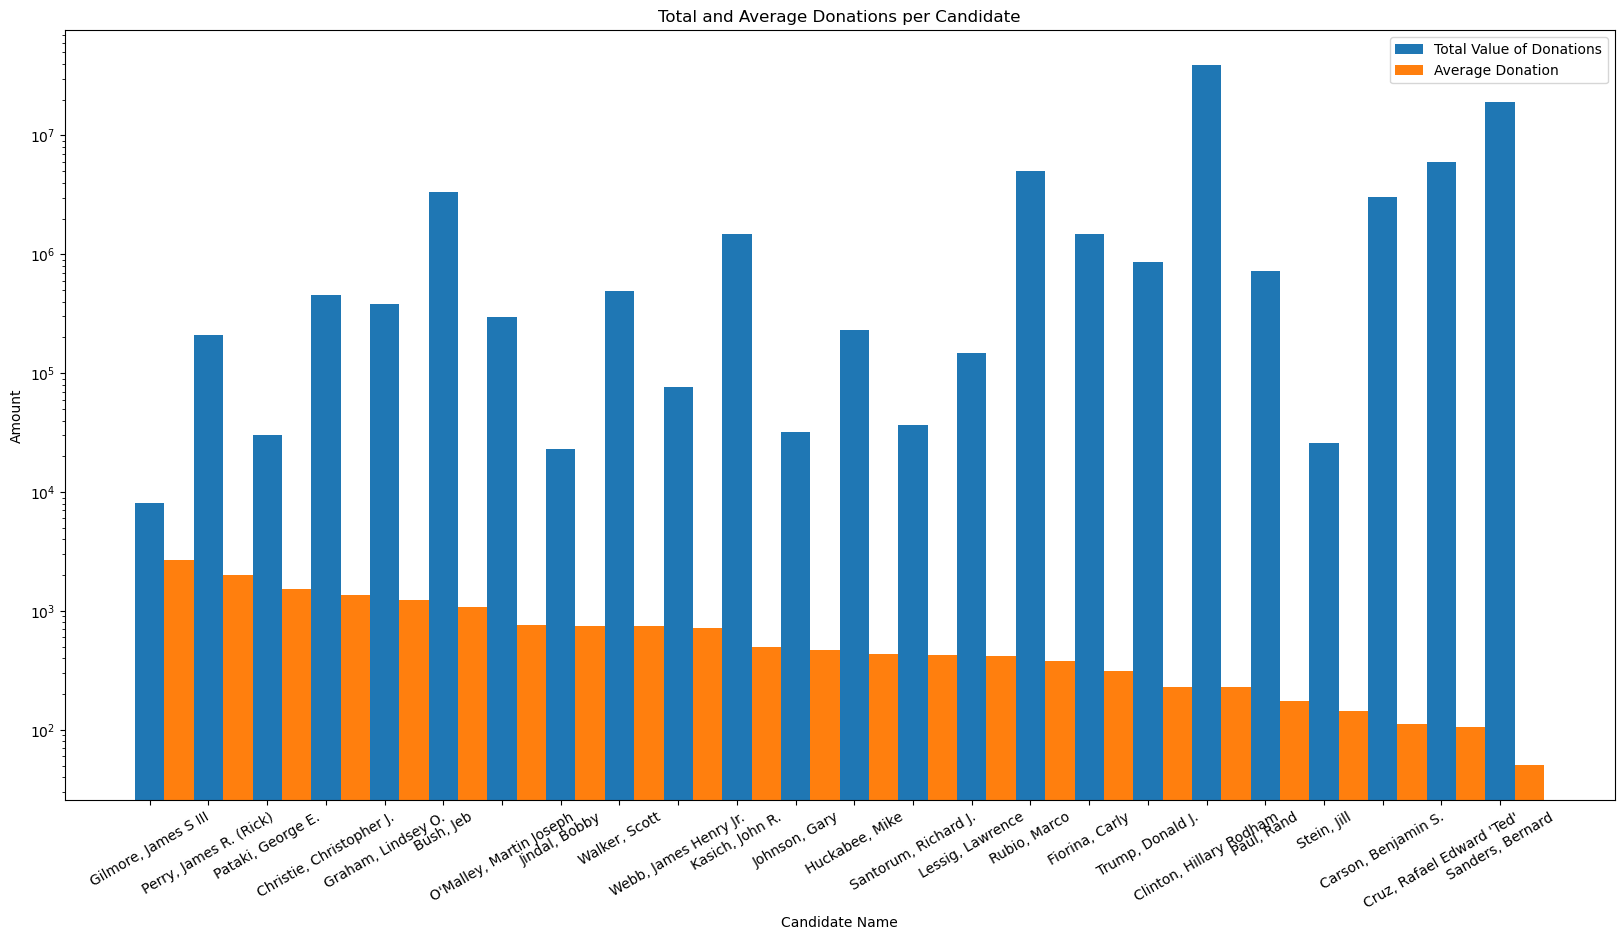

In [154]:
# 2e YOUR CODE HERE
index = np.arange(len(sort_average))

plt.figure(figsize=(20, 10))
plt.bar(index, sort_average['value_donations'], 0.5, label='Total Value of Donations')

plt.bar(index + 0.5, sort_average['average_donation'], 0.5, label='Average Donation')

plt.title('Total and Average Donations per Candidate')
plt.xlabel('Candidate Name')
plt.ylabel('Amount')
plt.yscale('log')
plt.xticks(index, sort_average['cand_nm'], rotation=30)
plt.legend()
plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** I have learned that its more about the quantity of the people donating not the quantity of the donation. As seen from the bar chart, Bernie Sanders and Hillary Clinton had the largest quantity of doners but had some of the smallest number of average donations, but still came out as the top raisers in all of California. 

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [39]:
# 3a YOUR CODE HERE
hillary_donations = contrib[contrib['cand_nm']== 'Clinton, Hillary Rodham']
top_occupations = hillary_donations['contbr_occupation'].value_counts().head(5)

print(top_occupations)


RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [155]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    top_jobs = df['contbr_occupation'].value_counts().head(5)
    return top_jobs

hillary_frame= contrib[contrib['cand_nm']== 'Clinton, Hillary Rodham']
hillary_jobs = get_donors(hillary_frame)
print(hillary_jobs)
    

RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64


**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [156]:
# 3c YOUR CODE HERE

hillary_df = contrib[contrib['cand_nm'] =='Clinton, Hillary Rodham']
top_hillary_jobs= get_donors(hillary_df)
print(top_hillary_jobs)

bernie_df = contrib[contrib['cand_nm']== 'Sanders, Bernard']
top_bernie_jobs = get_donors(bernie_df)
print(top_bernie_jobs)

trump_df = contrib[contrib['cand_nm'] =='Trump, Donald J.']
top_trump_jobs= get_donors(trump_df)
print(top_trump_jobs)


RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: contbr_occupation, dtype: int64
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: contbr_occupation, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [105]:
# 3d YOUR CODE HERE
candidate = contrib.groupby('cand_nm')
donors = candidate.apply(get_donors)
print(donors)


cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** The most donors for any candidate are retired persons, except for Bernie Sanders whose highest were unemployed. Homemakers also always seem to make the top five. Retired persons seem to be the most likely employment group to donate by a wide margin to both Republican and Democratic candidates.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** Bernie Sander's had a the largest number of individual contributes and was also the only candidate with a large number of unemployed people that contributed to his campaign. Additionally, there may be a link between Bernie Sander's low average donation amount and the large majority of his contributers being unemployed persons. 

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k